# Assignment 3

In the third assignment you will cluster hand-written digits using k-means. This is an unsupervised method and will therefore differ a bit from the previous assignments. 
You will also have to analyse the behavior of K-means for different parameter settings and initializations.

The assignment follows Andrew Ng's explanation of K-means and (re)watching his videos could be useful.

Publish your notebook (ipynb file) to your repository on Github. If you have any questions, please email Gosia and Rein and don't forget to commit the most recent version of you assignment on Github so that we can see your code.

Note: all code should be clear, add comments where necessary (especially if your code is not straightforward). You are free to discuss the assignment among each other, but stick to sharing ideas, not code.

### Deadline: December 1, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [60]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The dataset is the same as with logistic regression. However, you don't need to use the class labels as K-means is an unsupervised method.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


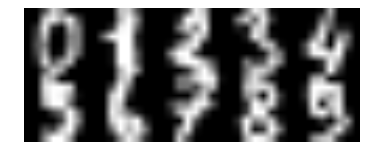

In [61]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

#Show both rows at the same time using nearest-neighbor interpolation (pixelated image)
#plt.imshow(np.vstack((firstrow,secondrow)),  interpolation="nearest")

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## Visualize functions

In order to make it more visible what K-means is learning, we provide two visualization functions. The first function takes the assignment of each digit to each cluster and shows what the digits of the cluster look like. If your algorithm works well then the digits should look alike!

The second function visualizes the actual cluster centroids. It is expected that you see something that resembles the original digit, but don't be surprised if one of the results is a combination, e.g. a zero and eight at the same time.

K-means is a very simple algorithm and is not likely to get an optimal result, therefore some of the centroids will be just noise. 

In [62]:
#With below code you can visualize the data clusters
#The input is a vector c (with all the datapoints assigned to a cluster)
#this function will show a bunch of numbers assigned to that cluster.
#It will skip the cluster if there are not enough images in it.

#You can use this code after you have finished implementing everything!
def visualize(best_c):
    for i in range(10):
        print "There are ", np.sum(c == i), " elements in cluster ", i
    
    for cluster in range(10):
        #Create two rows with numbers
        filtered = digits.images[c == cluster,:,:]

        if filtered.shape[0] < 5:
            print "not enough items in cluster ", cluster
            continue

        rows = np.floor(filtered.shape[0]/10)
        image_rows = []

        for i in range(min(5,int(rows))):
            image_row = np.hstack(filtered[i*10:(i+1)*10,:,:])
            image_rows.append(image_row)

        plt.gray()
        plt.axis('off')

        #Show both rows at the same time
        plt.imshow(np.vstack(image_rows))
        plt.show()

        print "The cluster shown above is: ", cluster

In [63]:
# This function visualizes the centroids. 
# It takes as input the matrix mu with the cluster centroids and shows an image.

#You can use this code after you have finished implementing everything!
def visualize_centroids(best_mu):
    mu = best_mu.T.reshape(10,8,8)
    
    #Create two rows with numbers
    firstrow = np.hstack(mu[:5,:,:])
    secondrow = np.hstack(mu[5:,:,:])

    plt.gray()
    plt.axis('off')

    #Show both rows at the same time
    plt.imshow(np.vstack((firstrow,secondrow)))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of k-means. Please follow Andrew Ng's description and the instructions that come with the functions closely. 

Think about the problem one step at a time. First focus on implementing the functions and only then start thinking about how they all come together. The skeleton code will guide you to make sure that it will come together. 

Grading:
- Working version of compute_centroid, update_centroid and cost_function (0.5 point each)
- A working triple loop that successfully learns and stores the best result (3 points)
- Correct use of both visualization functions on your best result and an explanation how you got to the best result and why it is necessary to have many initializations (1.5 points)

In [64]:
#First write a function that takes as input 1 image x and the cluster centroids mu. 
#It returns a number that is the closest centroid (index of the closest centroid)
from numpy import linalg as LA
def compute_centroid(x,mu):
    #mu will be of size 64 by k
    #x will be of size 64 (need to reshape to 64 by 1!)
    #You can subtract x from mu, and numpy will "broadcast" over the columns, result is 64 by k
    #Then you can take the norm over the columns (give option axis = 0)
    #return the index of the closest
    np.reshape(x, (64, 1))
    z = np.subtract(x, mu)
    z = LA.norm(z, axis=0)
    closest_column = np.argmin(z) 
    return closest_column


    
    


In [65]:
#Second write a function that takes as input:
#a cluster number
#the cluster centroids
#all the datapoints assigned to that cluster
#It returns an updated mu matrix for that cluster number
#a = np.random.randint(10, size = (64,10))
#b = np.random.randint(10, size = (64,10))
#c = 4

def update_centroid(centroid, mu, X_c):
    #you have to average over the columns in X_c and change only 1 specific column in mu
    mu[:,centroid] = np.average(X_c, axis=1) 
    return mu
    


In [66]:
#Now write the cost function. This will be exactly the same as the compute_centroid
#However it will return the actual minimum and not the index of the centroid
def cost_function(x,mu):
    x.reshape(64,1)
    z = np.subtract(x,mu)
    z = LA.norm(z, axis = 0)
    minimum = min(z)
    return minimum

cost function:


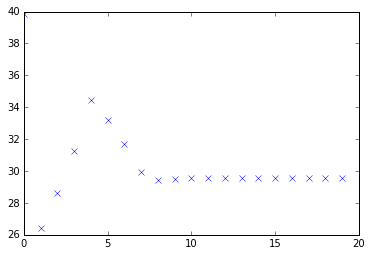

There are  217  elements in cluster  0
There are  170  elements in cluster  1
There are  153  elements in cluster  2
There are  135  elements in cluster  3
There are  151  elements in cluster  4
There are  170  elements in cluster  5
There are  147  elements in cluster  6
There are  119  elements in cluster  7
There are  81  elements in cluster  8
There are  157  elements in cluster  9


/Users/tax/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1797 but corresponding boolean dimension is 1500


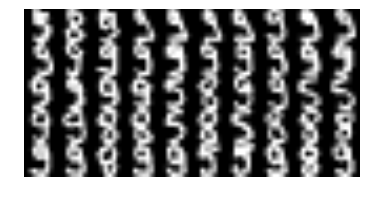

The cluster shown above is:  0


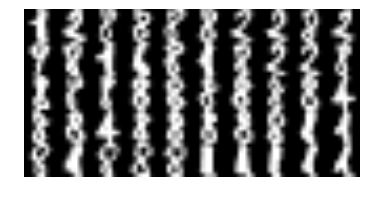

The cluster shown above is:  1


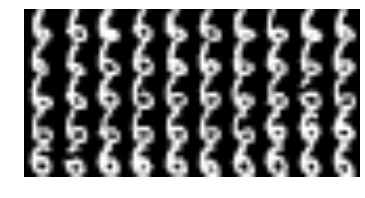

The cluster shown above is:  2


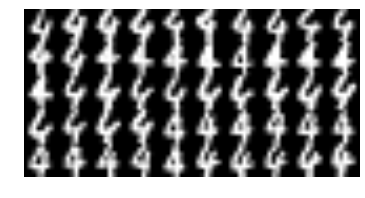

The cluster shown above is:  3


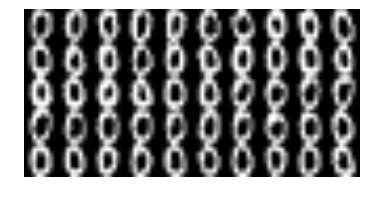

The cluster shown above is:  4


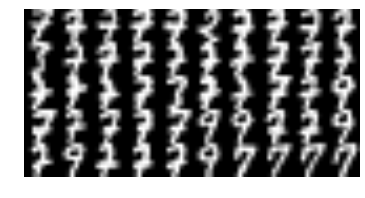

The cluster shown above is:  5


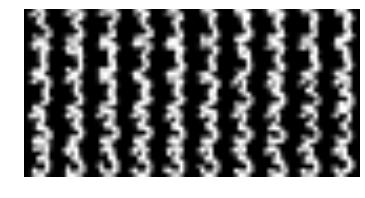

The cluster shown above is:  6


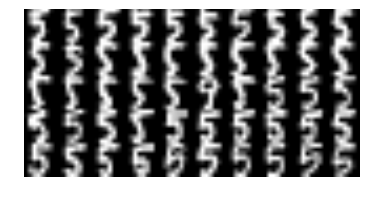

The cluster shown above is:  7


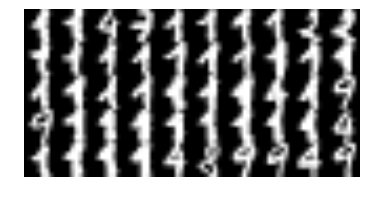

The cluster shown above is:  8


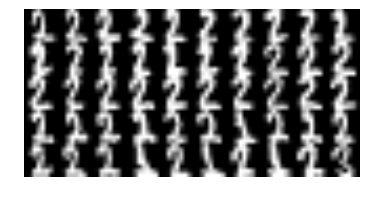

The cluster shown above is:  9
None
None


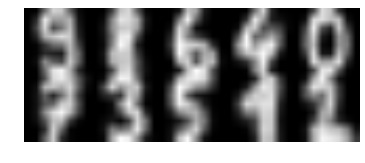

In [125]:
##Now you are going to link it all together again

#The amount of iterations
initialisation_iterations = 1 #in case this is set to be more than 1,
                              #the cost function will show them in one graph.
iterations = 20

#define the amount of clusters k, with a k other then 10 the visualize_centroids function does not work.
k = 10

x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

#This time the code constists of three layers of loops:
#The first loop is for different initialisations of mu
#The second loop is for the amount of iterations of the k means algorithm
#The third loop actually consists of two loops:
    #Loop 1 updates the centroid of all the clusters
    #Loop 2 assigns a new cluster to each datapoint


q = [] #empty list
cost = [] #empty list


for h in range(initialisation_iterations):
    #mu is the centroid matrix, initialized by sampling from a uniform distribution (shape is 64 by k!)
    mu = np.random.uniform(0,16,(64,k))
    
    #c is the vector that assigns each digit to a centroid
    #initialized with integers between 0 and 16, the shape is 1500 by nothing
    c = np.random.randint(0,k,(1500))

    
    for j in range(iterations):
        #mu is updated per column in x
        for i in range(k):
            X_c = x[c==i].T
            mu = update_centroid(i, mu, X_c)
            
        #x.shape[0] returns number of rows   
        for i in range(x.shape[0]):
            #for every row in x, the closest centroid is computed
            c[i] = compute_centroid(x[i].reshape(64,1), mu)
            #creates temperary cost
            cost_temp = cost_function(np.reshape(x[i],(64,1)),mu)
        
        #cost and iterations (q) are kept in lists
        cost = np.append(cost, cost_temp)
        q = np.append(q, j)

print "cost function:"
plt.plot(q, cost, 'x')
plt.show()
print visualize(x)
print visualize_centroids(mu)




## Bonus

There is a special "trick" you can do to make sure all clusters are used. You can do this by initializing the cluster centroids as the first ten digits. Luckily, the dataset x has as first 10 elements the first 10 digits.

Take the code with the three loops, remove the outer loop since you already know the "best" initialization and use the below line of code to initialize mu.

To show:
- Visualize the resulting centroids (Do they still resemble the digits?)
- Plot the cost over iterations and compare this to the original initialization

Max 0.5 points extra, your final amount of points cannot be more than 6.

Note: only attempt this if you're confident you got everything working.

In [ ]:
#You should initialize mu as:
mu = x[:10,:].T